## Mean, weighted mean, median, mode, variance, standard variance, z-score...

## mean -- the sum of the distances of the values that are below the mean is equal to the sum of the distances of the values that are above the mean
## mean can be considered as the balance point of a lever. If the total distance above and below the mean were equivalent to the forces exerted by the weights on the rod of the lever, then there would be the same amount of force exerted on each side of the mean.

In [1]:
import pandas as pd
pd.options.display.max_columns = 100
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
distribution = [0,2,3,3,3,4,13]
mean = np.array(distribution).mean()
mean

4.0

In [3]:
sum([4-i for i in distribution if i < 4]) == sum([i-4 for i in distribution if i > 4])

True

## Generate 5000 different distributions, measure the total distance above and below the mean

In [4]:
equal_distances = 0
for i in range(5000):
    np.random.seed = i
    random_numbers = np.random.randint(0,1001,10)
    mean = sum(random_numbers) / 10
    above = [round(j - mean, 1) for j in random_numbers if j > mean]
    below = [round(mean - j, 1) for j in random_numbers if j < mean]
    if round(sum(above),1) == round(sum(below),1):
        equal_distances +=1
        

In [5]:
equal_distances

5000

## Population number of values *N*, mean $\mu$
## Sample number of values *n*, mean *$\bar x$*
**$\sigma$**

In [6]:
houses = pd.read_csv('AmesHousing_1.txt', sep = '\t')
houses.sample(5, random_state = 1)

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
2126,2127,907135180,20,RL,60.0,8070,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,4,5,1994,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,588.0,Unf,0.0,402.0,990.0,GasA,Ex,Y,SBrkr,990,0,0,990,1.0,0.0,1,0,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,123600
192,193,903206120,75,RL,NaN,7793,Pave,NaN,IR1,Bnk,AllPub,Corner,Gtl,BrkSide,Norm,Norm,1Fam,2.5Unf,7,7,1922,2005,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BrkTil,Gd,TA,No,BLQ,474.0,Unf,0.0,634.0,1108.0,GasA,TA,N,FuseA,1160,908,0,2068,0.0,0.0,1,1,3,1,Gd,8,Typ,1,Gd,Detchd,1928.0,Unf,1.0,315.0,TA,TA,Y,0,0,60,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,209500
2406,2407,528181040,120,RL,40.0,6792,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,TwnhsE,1Story,7,5,2005,2006,Gable,CompShg,VinylSd,VinylSd,Stone,94.0,Gd,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,1368.0,1368.0,GasA,Ex,Y,SBrkr,1368,0,0,1368,0.0,0.0,2,0,2,1,Gd,6,Typ,1,Gd,Attchd,2005.0,RFn,2.0,474.0,TA,TA,Y,132,35,0,0,0,0,NaN,NaN,NaN,0,3,2006,New,Partial,202665
45,46,528175010,120,RL,44.0,6371,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,TwnhsE,1Story,7,5,2009,2010,Gable,CompShg,VinylSd,VinylSd,Stone,128.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,733.0,Unf,0.0,625.0,1358.0,GasA,Ex,Y,SBrkr,1358,0,0,1358,1.0,0.0,2,0,2,1,Gd,6,Typ,1,Gd,Attchd,2010.0,RFn,2.0,484.0,TA,TA,Y,192,35,0,0,0,0,NaN,NaN,NaN,0,6,2010,New,Partial,224000
2477,2478,531379030,60,RL,70.0,8304,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,2Story,6,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,941.0,941.0,GasA,Ex,Y,SBrkr,941,896,0,1837,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,Attchd,1997.0,RFn,2.0,688.0,TA,TA,Y,150,165,0,0,0,0,NaN,GdPrv,NaN,0,7,2006,WD,Normal,187000


In [7]:
houses.shape

(2930, 82)

In [8]:
houses.SalePrice.describe()

count      2930.000000
mean     180796.060068
std       79886.692357
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: SalePrice, dtype: float64

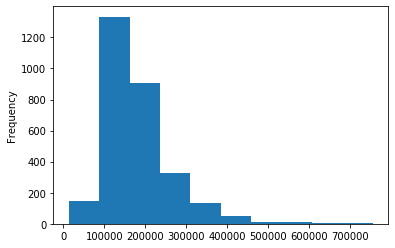

In [9]:
houses.SalePrice.plot.hist()

## *sampling error* = $\mu$ - $\bar x$
## Sampling error is given by the difference between a population's parameter and a sample's statistic.
## 1. Sample representativity
## 2. Sample size

In [10]:
population_mean = houses.SalePrice.mean()

In [11]:
size = 5
mean_errors = []
for i in range(101):
    sample = houses.SalePrice.sample(size, random_state=i)
    mean = sample.mean()
    sample_error = population_mean - mean
    mean_errors.append(sample_error)
    size += 29

In [12]:
samples_size = [5 + 29*i for i in range(101)]

Text(0, 0.5, 'Sampling error')

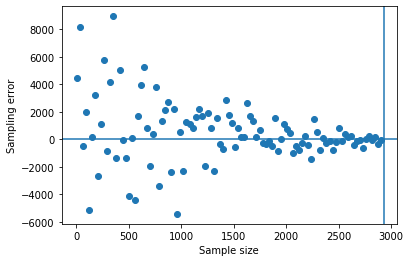

In [13]:
plt.scatter(x = samples_size, y = mean_errors)
plt.axhline(0)
plt.axvline(2930)
plt.xlabel('Sample size')
plt.ylabel('Sampling error')

## General tendency for the sampling error is to decrease as the sample size increases.

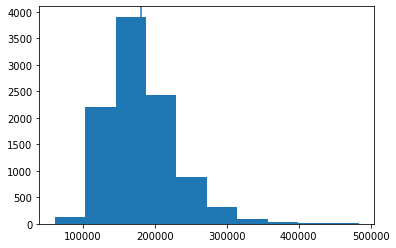

In [14]:
means = []
for i in range(10000):
    sample = houses.SalePrice.sample(3, random_state=i)
    means.append(sample.mean())

plt.hist(means)
plt.axvline(houses.SalePrice.mean())

## Most sample means cluster around the population mean.

In [15]:
sum(means) / len(means)

180824.7253000002

In [16]:
houses.SalePrice.mean()

180796.0600682594

(0, 500000)

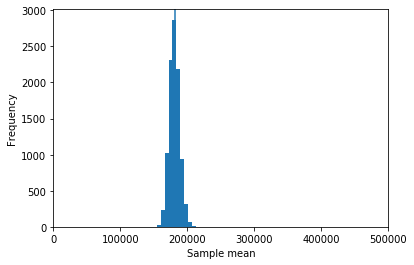

In [17]:
means_100 = []
for i in range(10000):
    sample = houses.SalePrice.sample(100, random_state=i)
    means_100.append(sample.mean())
plt.hist(means_100)
plt.axvline(houses.SalePrice.mean())
plt.xlabel('Sample mean')
plt.ylabel('Frequency')
plt.xlim(0,500000)

## As sample size increase, there will be less and less variability around the population mean.
## If there's less variability, there are less chances to get a poor estimate for the population mean.
## Mean of sample means
----------
* If we took all the possible samples fo a given sample size, we'd observe that the mean of the sample means will be equal to the population mean.
* When a statistic is on average equal to the parameter it estimates, we call that statistic an **unbiased estimator**, no matter whether sampling is replacement
* Sample mean $\bar x$ is an unbiased estimator for the population mean $\mu$ (All possible sample with specific size, like population [3,7,2], all samples are [3,7], [3,2], [7,3],[7,2], [2,3],[2,7] if no replacement)

In [18]:
population = [0,3,6]
means = []
for i in range(100):
    sample = np.random.choice(population, 2, replace = False)
    means.append(sum(sample) / len(sample))
sample_mean = sum(means) / len(means)   
population_mean = sum(population) / len(population)

---------------
--------------

# The weighted Mean and the Median

In [22]:
houses['Yr Sold'].value_counts(dropna=False)

2007    694
2009    648
2006    625
2008    622
2010    341
Name: Yr Sold, dtype: int64

In [30]:
houses_per_year = houses.pivot_table(index = 'Yr Sold', values=['SalePrice'], 
                  aggfunc={'SalePrice':[np.mean, np.size]}).reset_index()
houses_per_year.columns = ['Year', 'Mean Price', 'Houses Sold']
houses_per_year['Houses Sold'] = houses_per_year['Houses Sold'].astype(int)
houses_per_year

,Year,Mean Price,Houses Sold
0,2006,181761.648000,625
1,2007,185138.207493,694
2,2008,178841.750804,622
3,2009,181404.567901,648
4,2010,172597.598240,341


In [31]:
mean_new = houses_per_year['Mean Price'].mean()
mean_original = houses.SalePrice.mean()
difference = mean_original - mean_new
difference

847.3055805878539

* Mean of the Mean Price column is not equal to that of the SalePrice column. The root of the problem is related to the fact of different number of houses sold each year, weighs differently, when we calculated using Mean Price, give them same weight.

In [35]:
weighted_mean = (houses_per_year['Mean Price'] * houses_per_year['Houses Sold']).sum() / (houses_per_year['Houses Sold'].sum())
weighted_mean = round(weighted_mean, 10)
difference = mean_original - weighted_mean
difference

0.0

\begin{equation}
weighted\ mean = \frac{x_1w_1 + x_2w_2 + x_3w_3 + x_4w_4 + x_5w_5 + x_6w_6}{w_1 + w_2 + w_3 + w_4 + w_5 + w_6}
\end{equation}
\begin{equation}
[x_1, x_2,\ ...\ , x_n]
\end{equation}
\begin{equation}
[w_1, w_2,\ ...\ , w_n]
\end{equation}
\begin{equation}
weighted\ mean = \frac{x_1w_1 + x_2w_2 +\ ...\ + x_nw_n}{w_1 + w_2 +\ ...\ + w_n}
\end{equation}
--------------------------------------
\begin{equation}
weighted\ mean = \frac{\displaystyle\sum_{i = 1}^{n}x_iw_i}{\displaystyle\sum_{i = 1}^{n}w_i}
\end{equation}
## For population
\begin{equation}
\mu = \frac{\displaystyle\sum_{i = 1}^{N}x_iw_i}{\displaystyle\sum_{i = 1}^{N}w_i}
\end{equation}

In [43]:
def get_weighted_mean(x,y):
    values_sum = 0
    weights_sum = 0
    #for mean, weight in zip(x,y):
        
    for i in range(len(x)):
        values_sum += x[i] * y[i]
        weights_sum += y[i]
    return values_sum / weights_sum

In [38]:
weighted_mean_function = get_weighted_mean(houses_per_year['Mean Price'], houses_per_year['Houses Sold'])
weighted_mean_function

180796.0600682594

In [42]:
weighted_mean_numpy = np.average(houses_per_year['Mean Price'], weights=houses_per_year['Houses Sold'])
equal = weighted_mean_function == weighted_mean_numpy
equal

True

In [44]:
print(houses['TotRms AbvGrd'].value_counts(dropna = False))

6             844
7             649
5             586
8             347
4             203
9             143
10 or more    131
3              26
2               1
Name: TotRms AbvGrd, dtype: int64


* No **upper boundary**, TotRms AbvGrd variable has an **open-ended distribution.**
## Median, middle value

In [47]:
distribution1 = [23, 24, 22, '20 years or lower,', 23, 42, 35]
def to_int(alist):
    for i in range(len(alist)):
        if isinstance(alist[i], str):
            alist[i] = int(alist[i].split()[0])
to_int(distribution1)

In [48]:
distribution1

[23, 24, 22, 20, 23, 42, 35]

## In statistics, the term 'average' refers to the most representative value of a distribution. 'average' is not restricted to refer only to the mean, it can also refer to the median or the mode.

In [49]:
houses_rms = houses['TotRms AbvGrd'].str.replace('10 or more', '10').copy()

In [53]:
houses_rms = houses_rms.astype(int).sort_values()

In [57]:
houses_rms.size

2930

In [58]:
houses_rms[houses_rms.size // 2]

6

In [69]:
houses_rms = houses['TotRms AbvGrd'].str.replace('10 or more', '10').copy()
houses_rms = houses_rms.astype(int).sort_values()
index = len(houses_rms) // 2
median = (houses_rms.iloc[index-1] + houses_rms.iloc[index]) / 2

In [71]:
# Sort the values
rooms = houses['TotRms AbvGrd'].copy()
rooms = rooms.replace({'10 or more': 10})
rooms = rooms.astype(int)
rooms_sorted = rooms.sort_values()

# Find the median
middle_indices = [int((len(rooms_sorted) / 2) - 1),
                  int((len(rooms_sorted) / 2))
                 ] # len - 1 and len because Series use 0-indexing 
middle_values = rooms_sorted.iloc[middle_indices] # make sure you don't use loc[]
median = middle_values.mean()